<a href="https://colab.research.google.com/github/Mayuriluniya/Car_Damaged_Detection_Using_YOLOV5_VGG/blob/main/Car_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive'

MyDrive


In [ ]:
train_path = '/content/drive/MyDrive/Datasets/BumperDetection/training'
test_path = '/content/drive/MyDrive/Datasets/BumperDetection/validation'

Working with 164 images
Image examples: 
0008.JPEG


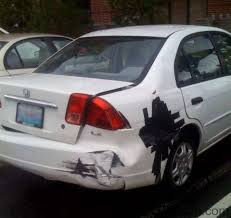

0007.JPEG


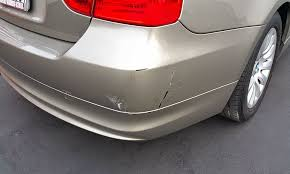

0006.JPEG


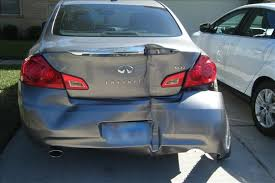

0005.JPEG


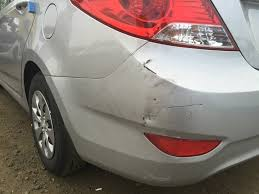

0175.JPEG


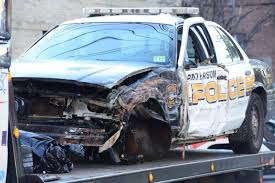

0178.JPEG


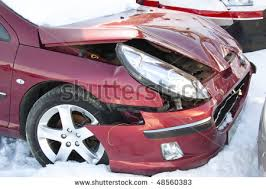

0179.JPEG


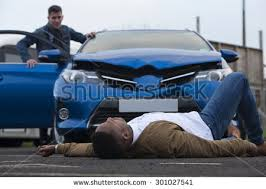

0174.JPEG


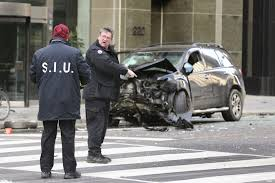

0173.JPEG


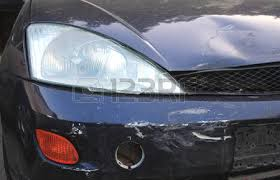

0169.jpeg


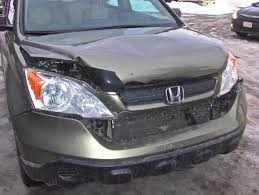

0171.JPEG


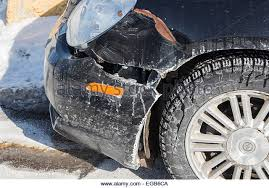

0172.jpeg


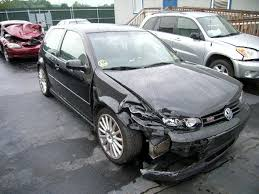

0170.JPEG


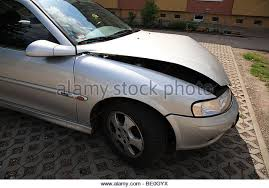

0167.JPEG


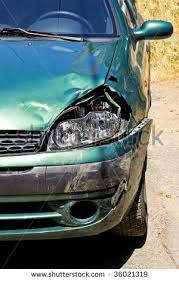

0166.JPEG


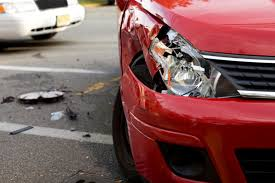

0165.JPEG


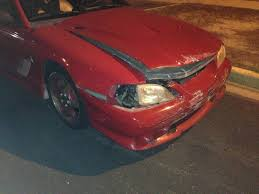

0168.JPEG


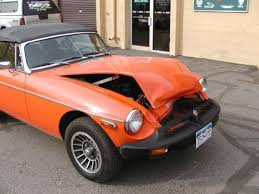

0164.JPEG


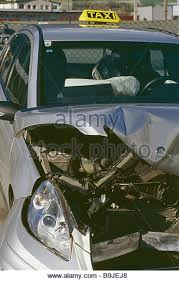

0162.jpeg


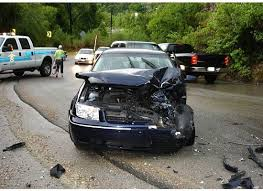

0124.JPEG


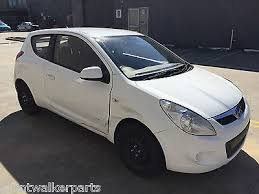

0108.jpeg


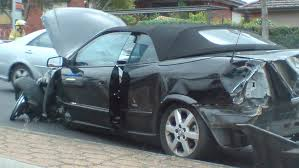

0163.JPEG


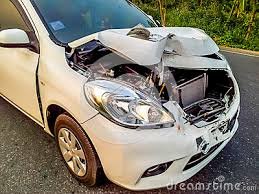

0104.JPEG


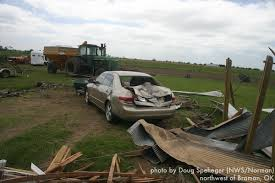

0098.JPEG


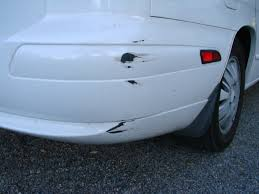

0097.JPEG


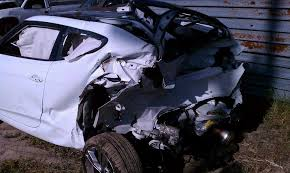

0096.JPEG


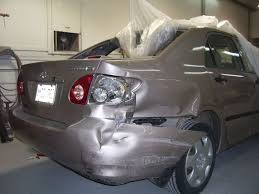

0094.JPEG


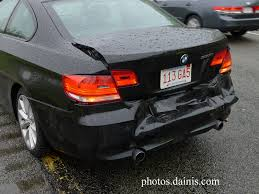

0076.JPEG


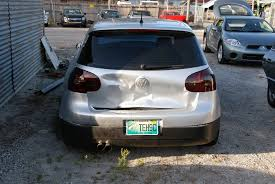

0084.JPEG


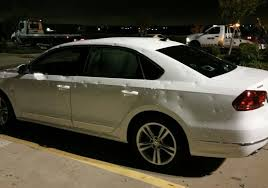

0092.JPEG


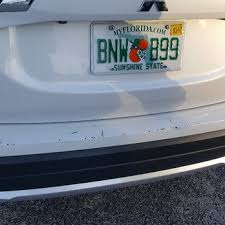

0064.JPEG


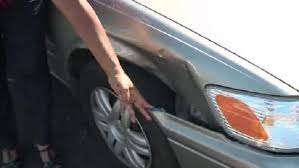

0083.JPEG


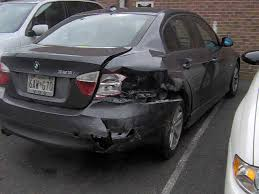

0072.JPEG


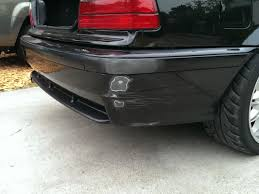

0054.JPEG


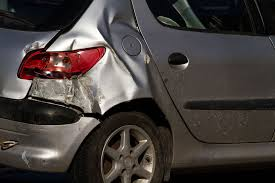

0026.JPEG


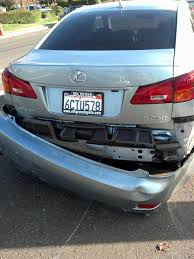

0040.JPEG


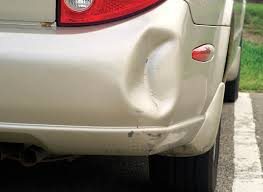

0029.JPEG


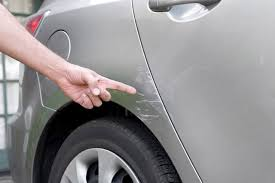

0036.JPEG


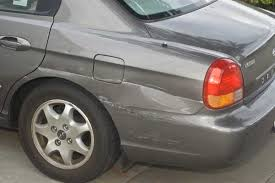

0031.JPEG


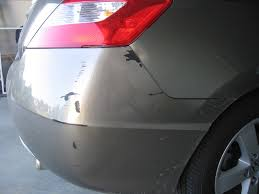

0027.JPEG


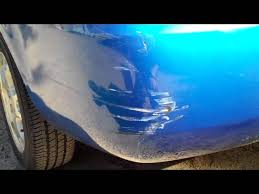

0028.JPEG


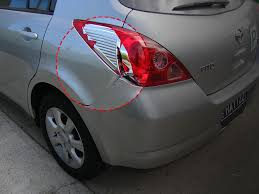

0033.JPEG


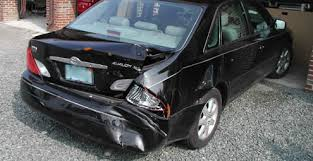

0025.JPEG


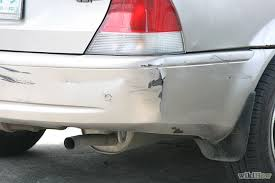

0017.JPEG


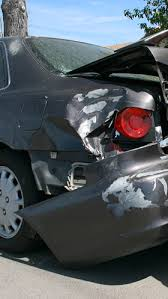

0014.JPEG


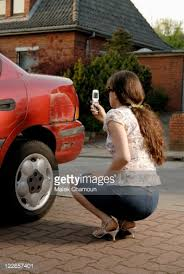

0012.JPEG


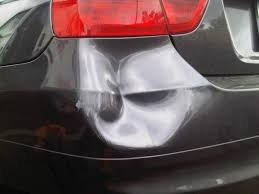

0220.JPEG


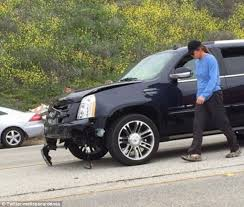

0226.JPEG


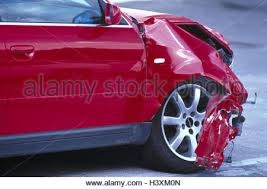

0223.JPEG


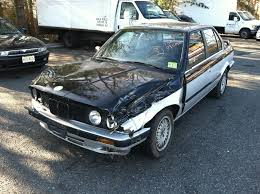

0230.JPEG


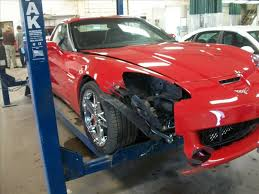

In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/damaged'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(50):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Datasets/BumperDetection/training/*')
print(len(folders))

2


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 328 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 122 images belonging to 2 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=328//2,
  validation_steps=122//2,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
164/164 - 255s - loss: 0.9924 - accuracy: 0.9573 - val_loss: 1.0800 - val_accuracy: 0.9590

Epoch 00001: val_loss improved from inf to 1.08002, saving model to mymodel.h5
Training completed in time:  0:04:16.400477


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_imgs(title, paths):
    fig = plt.figure(figsize=(14, 8), dpi=72)
    fig.suptitle(title, fontsize=24, y=1.05)
    for i, row in paths.iterrows():
        img=mpimg.imread(row['path'])
        plt.subplot(3, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        subtitle = 'YES' if row['damaged'] == 1 else 'NO'
        plt.title(subtitle)
        plt.imshow(img)
    plt.tight_layout()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None)
    plt.show()
    

In [ ]:
from keras.preprocessing import image
from keras.models import load_model
saved_model=model.save_weights("mymodel.h5")

In [ ]:
from sklearn.metrics import confusion_matrix as cm
def obtain_errors(val_generator, predictions):
    fnames = val_generator.filenames

    ground_truth = val_generator.classes

    label2index = val_generator.class_indices

    idx2label = list(label2index.keys())
    print("The list of classes: ", idx2label)

    predicted_classes = np.argmax(predictions, axis=1)
    print("The confusion matrix is as follows")
    print(cm(predicted_classes, ground_truth))
    print(ground_truth)
    print(predicted_classes)
    errors = np.where(predicted_classes != ground_truth)[0]
    print("Number of errors = {}/{}".format(len(errors),val_generator.samples))
    
    return idx2label, errors, fnames

predictions = model.predict(test_set)
idx2label, errors, fnames = obtain_errors(test_set, predictions)

The list of classes:  ['damaged', 'undamaged']
The confusion matrix is as follows
[[30 33]
 [31 28]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]
[1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0
 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1
 0 1 0 1 1 0 0 1 1 1 1]
Number of errors = 64/122


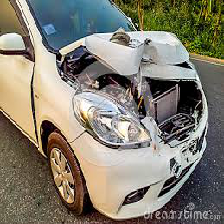

  damaged


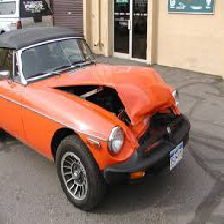

  damaged


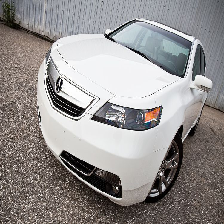

  damaged


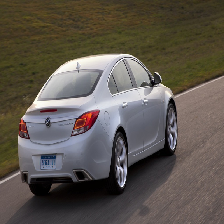

 not damaged


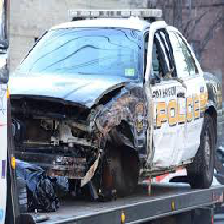

  damaged


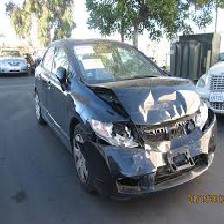

  damaged


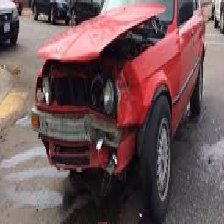

  damaged


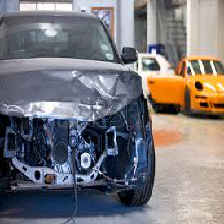

  damaged


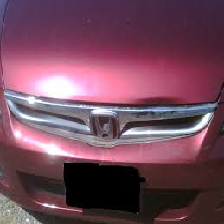

  damaged


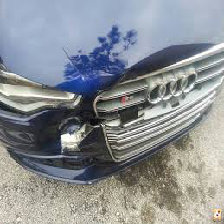

  damaged


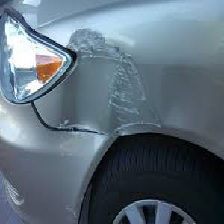

  damaged


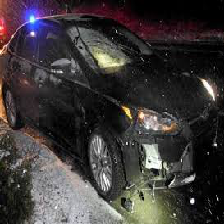

  damaged


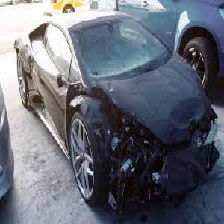

  damaged


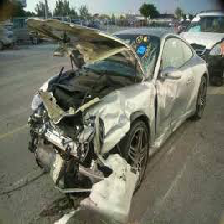

  damaged


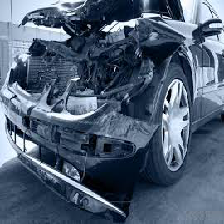

  damaged


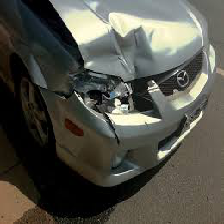

  damaged


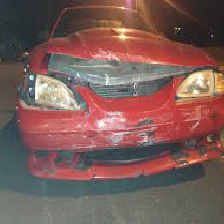

  damaged


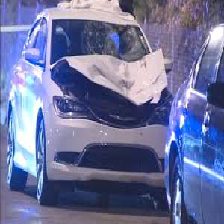

  damaged


In [ ]:
from io import BytesIO
import PIL
from IPython.display import display,Image
def display_img_array(img):
  img=PIL.Image.fromarray(img)
  bio=BytesIO()
  img.save(bio,format='png')
  display(Image(bio.getvalue(),format='png'))
for num in range(37,55,1):
  path="/content/drive/MyDrive/Datasets/000/"+str(num)+".JPEG"
  img=image.load_img(path,target_size=(224,224))
  img=np.asarray(img)
  display_img_array(img)
  img=np.expand_dims(img,axis=0)
  output=model.predict(img)
  if output[0][0]>output[0][1]:
    print("  damaged")

  else:
    print(" not damaged")


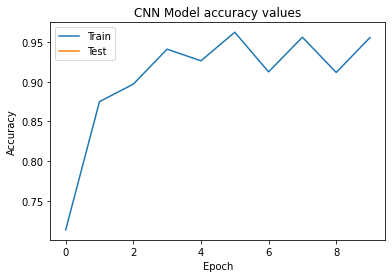

In [ ]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plot_imgs("Train", create_dataframe(train_path).sample(15).reset_index(drop=True))
plot_imgs("Validation", create_dataframe(test_path).sample(15).reset_index(drop=True))

NameError: ignored